# Cross validation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Import methods from scripts/
from path import (add_src_to_path, create_out_dir, extract_archives,
                  DATA_TRAIN_PATH)
from proj1_helpers import load_csv_data

# Add src to path to import implementations
add_src_to_path()

# Import functions from src/
from cross_validation import get_best_param
from implementations import ridge_regression
from print_utils import print_shapes, print_shapes_by_jet
from split_data import split_by_jet, split_train_test

In [3]:
# Extract archives if needed
extract_archives()

# Create output directory if needed
create_out_dir()

In [4]:
# Load the data
y, x, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False, label_b=0)
print_shapes(y, x)

Shape of y: (250000,)
Shape of x: (250000, 30)


In [5]:
# Split data
x_tr, x_te, y_tr, y_te = split_train_test(y, x)
print('Training data:')
print_shapes(y_tr, x_tr)
print('Test data:')
print_shapes(y_te, x_te)

Training data:
Shape of y: (200000,)
Shape of x: (200000, 30)
Test data:
Shape of y: (50000,)
Shape of x: (50000, 30)


In [6]:
# Split train data by jet
y_tr_by_jet, x_tr_by_jet, _ = split_by_jet(y_tr, x_tr)
print_shapes_by_jet(y_tr_by_jet, x_tr_by_jet)

Jet = 0:
Shape of y: (79923,)
Shape of x: (79923, 18)
Jet = 1:
Shape of y: (61985,)
Shape of x: (61985, 22)
Jet = 2:
Shape of y: (40333,)
Shape of x: (40333, 29)
Jet = 3:
Shape of y: (17759,)
Shape of x: (17759, 29)


In [7]:
# Split test data by jet
y_te_by_jet, x_te_by_jet, _ = split_by_jet(y_te, x_te)
print_shapes_by_jet(y_te_by_jet, x_te_by_jet)

Jet = 0:
Shape of y: (19990,)
Shape of x: (19990, 18)
Jet = 1:
Shape of y: (15559,)
Shape of x: (15559, 22)
Jet = 2:
Shape of y: (10046,)
Shape of x: (10046, 29)
Jet = 3:
Shape of y: (4405,)
Shape of x: (4405, 29)


[1.00000000e-15 6.15848211e-15 3.79269019e-14 2.33572147e-13
 1.43844989e-12 8.85866790e-12 5.45559478e-11 3.35981829e-10
 2.06913808e-09 1.27427499e-08 7.84759970e-08 4.83293024e-07
 2.97635144e-06 1.83298071e-05 1.12883789e-04 6.95192796e-04
 4.28133240e-03 2.63665090e-02 1.62377674e-01 1.00000000e+00]
Jet = 0:
[Start] Cross validation
[CP] Lambda_ = 1e-15, Accuracy = 0.750
[CP] Lambda_ = 6.158482110660255e-15, Accuracy = 0.750
[CP] Lambda_ = 3.7926901907322537e-14, Accuracy = 0.750
[CP] Lambda_ = 2.335721469090121e-13, Accuracy = 0.750
[CP] Lambda_ = 1.438449888287666e-12, Accuracy = 0.751
[CP] Lambda_ = 8.858667904100833e-12, Accuracy = 0.753
[CP] Lambda_ = 5.4555947811685145e-11, Accuracy = 0.757
[CP] Lambda_ = 3.3598182862837877e-10, Accuracy = 0.755
[CP] Lambda_ = 2.06913808111479e-09, Accuracy = 0.752
[CP] Lambda_ = 1.2742749857031347e-08, Accuracy = 0.751
[CP] Lambda_ = 7.847599703514623e-08, Accuracy = 0.752
[CP] Lambda_ = 4.832930238571752e-07, Accuracy = 0.752
[CP] Lambda_ 

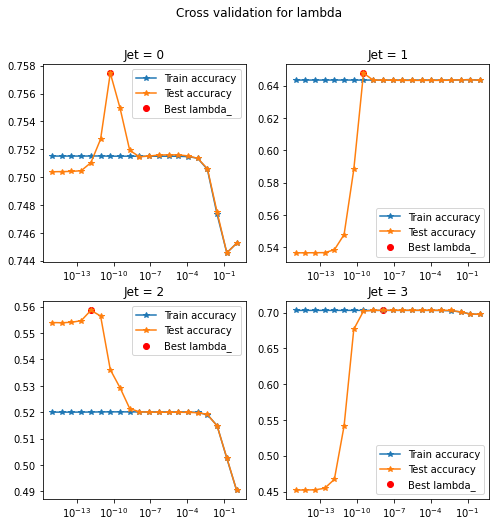

In [8]:
# Cross validation for lambda
lambdas = np.logspace(-15, 0, 20)
print(lambdas)
plt.figure(figsize=(8, 8))
best_lambdas = list()
for i, x_tr_jet, y_tr_jet in zip(
    range(len(x_tr_by_jet)), x_tr_by_jet, y_tr_by_jet):
    print(f'Jet = {i}:')
    plt.subplot(2, 2, i + 1, xscale='log')
    lambda_ = get_best_param(y_tr_jet, x_tr_jet, ridge_regression, 'lambda_',
                            lambdas, verbose=True, plot=True,
                            title=f'Jet = {i}')
    best_lambdas.append(lambda_)
plt.suptitle('Cross validation for lambda')
print('Best lambdas:', best_lambdas)

Jet = 0:
[Start] Cross validation
[CP] Degree = 1, Accuracy = 0.765
[CP] Degree = 2, Accuracy = 0.771
[CP] Degree = 3, Accuracy = 0.719
[CP] Degree = 4, Accuracy = 0.472
[CP] Degree = 5, Accuracy = 0.518
[CP] Degree = 6, Accuracy = 0.594
[CP] Degree = 7, Accuracy = 0.622
[CP] Degree = 8, Accuracy = 0.437
[CP] Degree = 9, Accuracy = 0.440
[CP] Degree = 10, Accuracy = 0.377
[CP] Degree = 11, Accuracy = 0.407
[CP] Degree = 12, Accuracy = 0.363
[CP] Degree = 13, Accuracy = 0.496
[CP] Degree = 14, Accuracy = 0.413
[End] Cross validation (time:  23.48 s.)
[Results] Best degree: 2
Jet = 1:
[Start] Cross validation
[CP] Degree = 1, Accuracy = 0.650
[CP] Degree = 2, Accuracy = 0.656
[CP] Degree = 3, Accuracy = 0.658
[CP] Degree = 4, Accuracy = 0.662
[CP] Degree = 5, Accuracy = 0.664
[CP] Degree = 6, Accuracy = 0.666
[CP] Degree = 7, Accuracy = 0.653
[CP] Degree = 8, Accuracy = 0.681
[CP] Degree = 9, Accuracy = 0.655
[CP] Degree = 10, Accuracy = 0.702
[CP] Degree = 11, Accuracy = 0.722
[CP] Degr

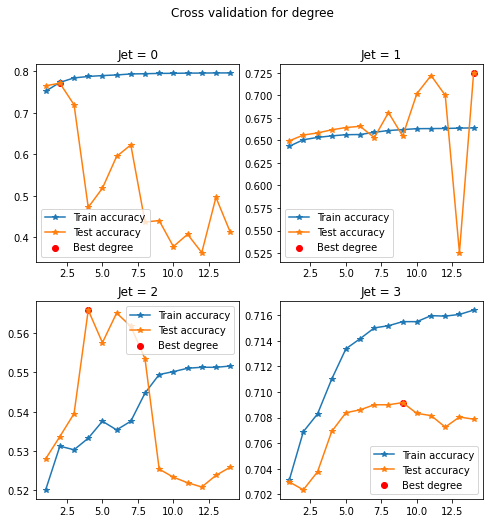

In [9]:
# Cross validation for degree by jet
degrees = list(range(1, 15))
plt.figure(figsize=(8, 8))
best_degrees = list()
for i, x_tr_jet, y_tr_jet in zip(
    range(len(x_tr_by_jet)), x_tr_by_jet, y_tr_by_jet):
    print(f'Jet = {i}:')
    plt.subplot(2, 2, i + 1)
    lambda_ = best_lambdas[i]
    degree = get_best_param(y_tr_jet, x_tr_jet, ridge_regression, 'degree',
                            degrees, verbose=True, plot=True,
                            title=f'Jet = {i}', lambda_=lambda_)
    best_degrees.append(degree)
plt.suptitle('Cross validation for degree')
print('Best degrees:', best_degrees)